# Una Prova Tranquilla
Tentativo di una prima analisi e visualizzazione dati con Jupyter

## Esercizio 1.1

### 1.1.1: Media dei valori simulati

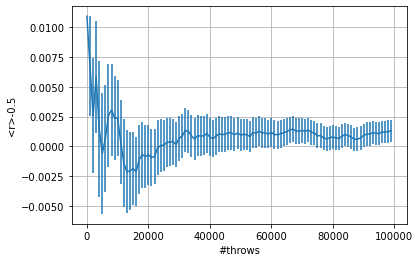

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)*1000
f, error = np.loadtxt("data/1means.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,f-0.5,yerr=error)
plt.xlabel('#throws')
plt.ylabel('<r>-0.5')
plt.grid(True)

plt.show()


### 1.2: Deviazione standard


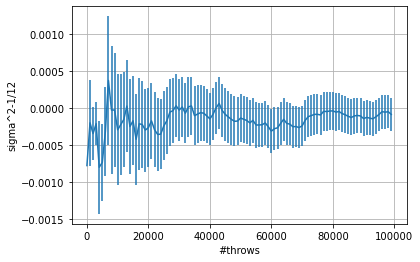

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(100)*1000
expected = float(1)/float(12)
f, error = np.loadtxt("data/1vars.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,f-expected,yerr=error)
plt.xlabel('#throws')
plt.ylabel('sigma^2-1/12')
plt.grid(True)

plt.show()

### 1.3: Chi quadro

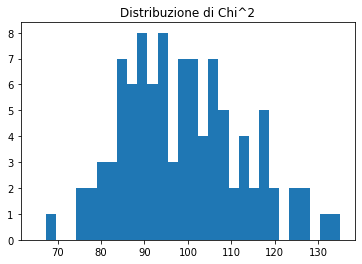

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

chi = np.loadtxt('data/1Chi.dat')
nbins = 30

n, bins, patches = plt.hist(chi, nbins, range=(65,135) )
#plt.xlabel('Valori di Chi^2')
plt.title('Distribuzione di Chi^2')

plt.show()

In questo ultimo grafico si vede bene che il valore del Chi quadro oscilla parecchio rispetto al valore aspettato per distribuzioni casuali (Chi = 100)

## Esercizio 1.2

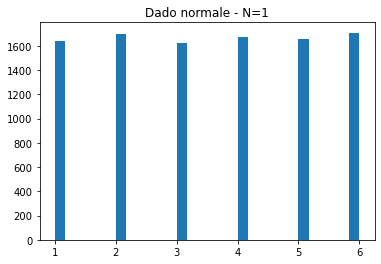

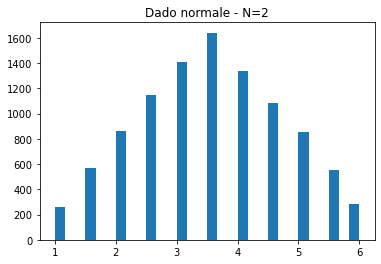

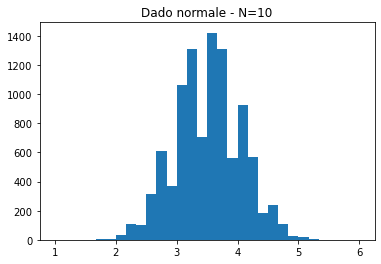

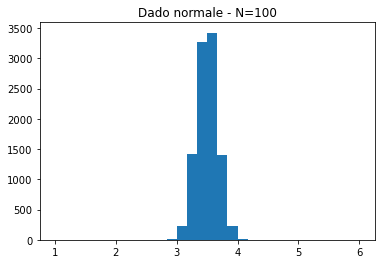

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def f(x,a,b,c):
    return a*np.exp(-b*(x-c)**2)

norm1, norm2, norm10, norm100 = np.loadtxt('data/2norm.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')
nbins = 30

n, bins, patches = plt.hist(norm1, nbins, range=(1,6) )
plt.title('Dado normale - N=1')

plt.figure()

n, bins, patches = plt.hist(norm2, nbins, range=(1,6) )
plt.title('Dado normale - N=2')

plt.figure()

n, bins, patches = plt.hist(norm10, nbins, range=(1,6) )
plt.title('Dado normale - N=10')

plt.figure()

n, bins, patches = plt.hist(norm100, nbins, range=(1,6) )
plt.title('Dado normale - N=100')

plt.show()

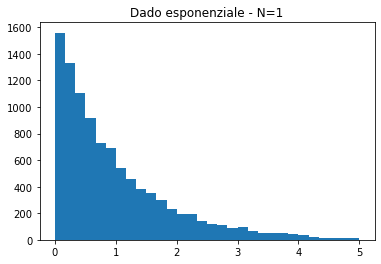

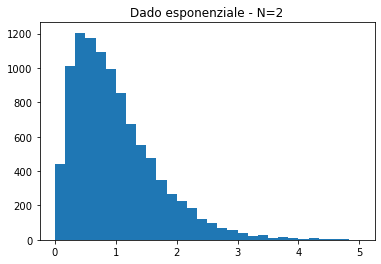

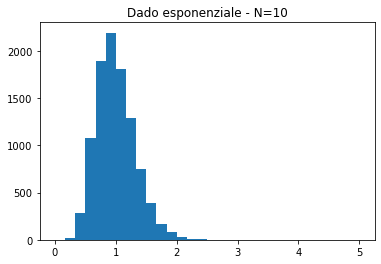

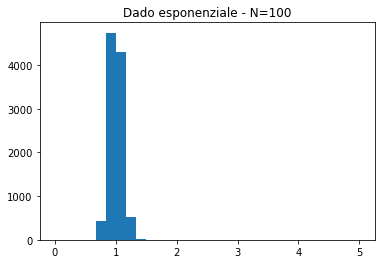

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

exp1, exp2, exp10, exp100 = np.loadtxt('data/2exp.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')
nbins = 30

n, bins, patches = plt.hist(exp1, nbins, range=(0,5) )
plt.title('Dado esponenziale - N=1')

plt.figure()

n, bins, patches = plt.hist(exp2, nbins, range=(0,5) )
plt.title('Dado esponenziale - N=2')

plt.figure()

n, bins, patches = plt.hist(exp10, nbins, range=(0,5) )
plt.title('Dado esponenziale - N=10')

plt.figure()

n, bins, patches = plt.hist(exp100, nbins, range=(0,5) )
plt.title('Dado esponenziale - N=100')

plt.show()

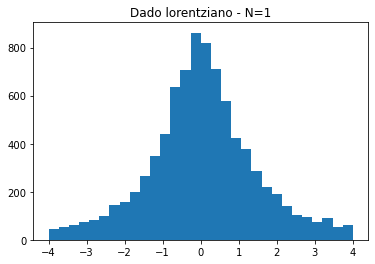

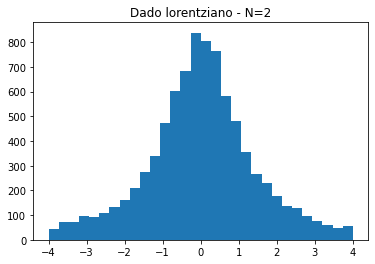

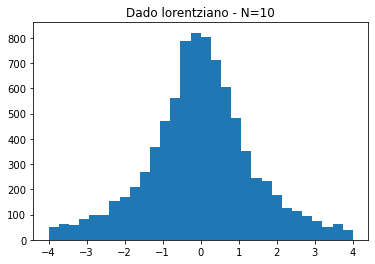

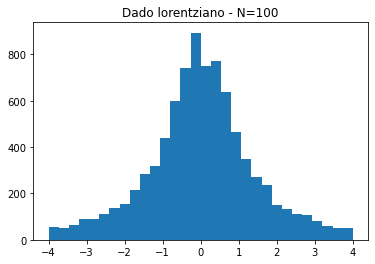

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

lor1, lor2, lor10, lor100 = np.loadtxt('data/2lor.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')
nbins = 30

n, bins, patches = plt.hist(lor1, nbins, range=(-4,4) )
plt.title('Dado lorentziano - N=1')

plt.figure()

n, bins, patches = plt.hist(lor2, nbins, range=(-4,4) )
plt.title('Dado lorentziano - N=2')

plt.figure()

n, bins, patches = plt.hist(lor10, nbins, range=(-4,4) )
plt.title('Dado lorentziano - N=10')

plt.figure()

n, bins, patches = plt.hist(lor100, nbins, range=(-4,4) )
plt.title('Dado lorentziano - N=100')

plt.show()

manca da fare il fit. In generale, scirvere un po' di commentino per tuto quello che si fa, probabilmente.


## Esercizio 1.3


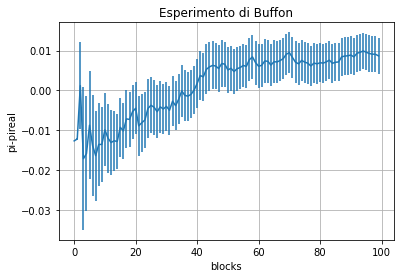

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

y,err = np.loadtxt("data/03.dat",usecols=(0,1),unpack=True,delimiter=' ')
x = np.arange(y.size)

plt.errorbar(x,y-math.pi,err)
plt.grid(True)
plt.title("Esperimento di Buffon")
plt.xlabel("blocks")
plt.ylabel('pi-pireal')

plt.show()